**In this notebook:** 
    
    - we plot the relative attack rate per group

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm
import math
import random

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

import seaborn as sns

from scipy.integrate import odeint
from numpy import linalg as LA

from itertools import chain

In [11]:
plt.rcParams['savefig.transparent']=False
plt.rcParams['savefig.facecolor']='white'

# read population data

In [12]:
# # read population data

data_pop_grouped = pd.read_csv("./../data/pop_size_by_age_SEP_edu.csv")

dict_pop_full = dict(zip(data_pop_grouped[['age_group',
                           'sep_level', 'edu_level']].apply(lambda x:
                                               x[0]+", "+x[1]+", "+x[2], axis=1).values,
                   data_pop_grouped['population']))
                   
pop_age = data_pop_grouped.groupby('age_group')['population'].sum()
pop_age = dict(zip(pop_age.index, pop_age.values))

distrib_pop = data_pop_grouped.groupby('age_group')['population'].sum()/data_pop_grouped['population'].sum()
distrib_pop = dict(zip(distrib_pop.index, distrib_pop.values))

In [13]:
order_groups = ['0-14, low SEP, low edu', 
                '0-14, high SEP, low edu',
                '15-24, low SEP, low edu', 
                '15-24, low SEP, high edu',
                '15-24, high SEP, low edu', 
                '15-24, high SEP, high edu',
                '25-64, low SEP, low edu', 
                '25-64, low SEP, high edu',
                '25-64, high SEP, low edu', 
                '25-64, high SEP, high edu',
                '65+, low SEP, low edu', 
                '65+, low SEP, high edu',
                '65+, high SEP, low edu', 
                '65+, high SEP, high edu']

# plot attack rates

In [14]:
save_output = pd.read_csv("./../output/epidemic_output/output_simulations_susc_children0.5.csv")

In [15]:
save_output.head()

,comb,epi_tail,"AR_0-14, low SEP, low edu","AR_0-14, high SEP, low edu","AR_15-24, low SEP, low edu","AR_15-24, low SEP, high edu","AR_15-24, high SEP, low edu","AR_15-24, high SEP, high edu","AR_25-64, low SEP, low edu","AR_25-64, low SEP, high edu",...,"AR_25-64, high SEP, high edu","AR_65+, low SEP, low edu","AR_65+, low SEP, high edu","AR_65+, high SEP, low edu","AR_65+, high SEP, high edu",AR_overall,AR_0-14,AR_15-24,AR_25-64,AR_65+
0,0,0.638938,46.425126,46.406698,74.217922,89.381441,67.269589,67.115506,54.917506,60.300609,...,56.547647,45.633385,50.275878,41.454213,54.899341,54.377780,46.412452,69.932264,56.621823,45.876935
1,1,0.629327,46.359250,46.311227,75.153120,88.719633,66.482344,68.291461,55.466259,61.130622,...,56.490044,44.963753,50.984652,41.420997,55.083045,54.268227,46.326221,69.772356,56.512103,45.776256
2,2,0.650303,46.904175,46.002692,74.468898,89.816523,66.620990,69.044224,55.969580,60.450176,...,56.035265,43.753985,50.526646,41.582067,55.959835,54.224117,46.284156,69.729518,56.479181,45.697436
3,3,0.611026,46.811534,46.070833,74.409263,89.757748,66.914494,66.899523,55.381290,61.501912,...,56.220735,43.543214,50.591898,42.074609,55.345225,54.244784,46.302097,69.767359,56.484893,45.754492
4,4,0.681358,46.661749,46.010701,74.966071,89.745933,66.458037,66.441741,55.031847,60.128729,...,56.326148,43.946388,51.004560,41.584148,55.314168,54.150913,46.213974,69.623236,56.404049,45.644982


In [16]:
save_output[['AR_0-14', 'AR_15-24', 'AR_25-64', 'AR_65+']].median()

AR_0-14     46.264840
AR_15-24    69.719343
AR_25-64    56.462044
AR_65+      45.721673
dtype: float64

1000


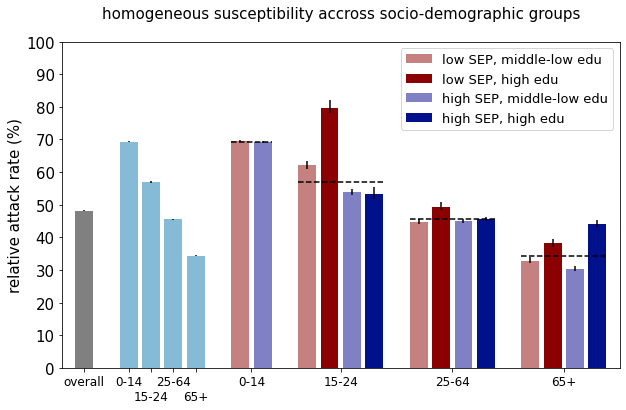

1000


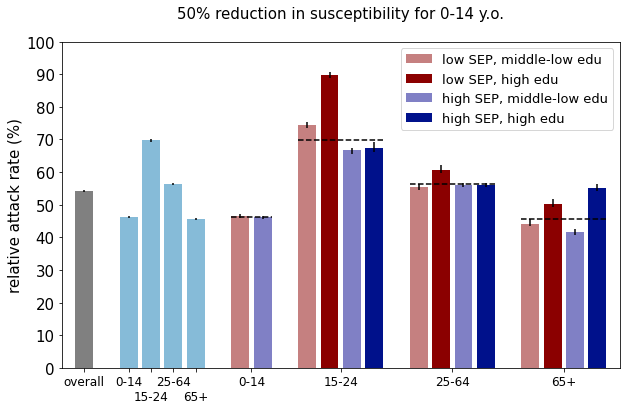

In [17]:
light_red = "#C58080"
light_blue = "#8080C5"
dark_red = "#8B0000"
dark_blue = "#00118B"

cols = dict(zip(order_groups, [light_red, light_blue, 
                          light_red, dark_red,
                          light_blue, dark_blue, 
                          light_red, dark_red,
                          light_blue, dark_blue, 
                          light_red, dark_red,
                          light_blue, dark_blue] ))
    
    
for susc_children in [1.0, 0.5]:
    
    save_output = pd.read_csv("./../output/epidemic_output/output_simulations_susc_children{}.csv".format(susc_children))
    print(len(save_output))
    
    plt.figure(figsize=(10,6)) 

    plt.bar([0], [0], color=light_red, label = 'low SEP, middle-low edu')
    plt.bar([0], [0], color=dark_red, label = 'low SEP, high edu')
    plt.bar([0], [0], color=light_blue, label = 'high SEP, middle-low edu')
    plt.bar([0], [0], color=dark_blue , label = 'high SEP, high edu')

    plt.legend(fontsize=13, bbox_to_anchor=(1,1), loc="upper right")

    shift = 0
    for h,group in enumerate(order_groups):
        if h in [2, 6, 10, 14]:
            shift+=1
        plt.bar(h+shift, save_output['AR_'+group].median(), label = group, 
                color=cols[group])
        plt.vlines(h+shift, save_output['AR_'+group].quantile(0.025),save_output['AR_'+group].quantile(0.975), 
                  color="black") 

    plt.bar(-7,save_output['AR_overall'].median(), color='gray')
    plt.vlines(-7, save_output['AR_overall'].quantile(0.025),save_output['AR_overall'].quantile(0.975), 
                  color="black") 

    plt.bar([-5, -4,-3,-2], save_output[['AR_0-14', 'AR_15-24', 'AR_25-64', 'AR_65+']].median().values, 
            color="#86BBD8")
    plt.vlines([-5, -4,-3,-2], 
               save_output[['AR_0-14', 'AR_15-24', 'AR_25-64', 'AR_65+']].quantile(0.025),
               save_output[['AR_0-14', 'AR_15-24', 'AR_25-64', 'AR_65+']].quantile(0.975), 
                  color="black") 

    allunga = 0.4
    plt.hlines(xmin=0-allunga,xmax=1+allunga,y=save_output[['AR_0-14']].median().values,color='black', linestyle="dashed")
    plt.hlines(xmin=3-allunga,xmax=6+allunga,y=save_output[['AR_15-24']].median().values,color='black', linestyle="dashed")
    plt.hlines(xmin=8-allunga,xmax=11+allunga,y=save_output[['AR_25-64']].median().values,color='black', linestyle="dashed")
    plt.hlines(xmin=13-allunga,xmax=16+allunga,y=save_output[['AR_65+']].median().values,color='black', linestyle="dashed")

    #plt.legend(bbox_to_anchor=(1,1))
    plt.xticks([-7,
                -5,-4,-3,-2,
                0.5,4.5,9.5,14.5], fontsize=12, 
               labels = ['overall', 
                         '0-14', '\n15-24', '25-64', '\n65+', 
                         '0-14', '15-24', '25-64', '65+'])
    plt.ylim([0,100])
    plt.xlim([-8,17])
    plt.ylabel("relative attack rate (%)", fontsize=15)

    plt.yticks(np.arange(0,110,10), fontsize=15)
    
    if susc_children == 1.0:
        plt.title('homogeneous susceptibility accross socio-demographic groups\n', fontsize=15)
    elif susc_children == 0.5:
        plt.title('50% reduction in susceptibility for 0-14 y.o.\n', fontsize=15)
    else:
        sys.exit()

    plt.savefig("./../output/figures/relative_attack_rate_susc_children{}.png".format(susc_children), 
                dpi=200, bbox_inches="tight")

    plt.show()